In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

More important than the park count data may be the part shape data so we are going to create a function in order to be able to take a closer look at any desired neighborhood

In [3]:
parks = gpd.read_file('https://opendata.arcgis.com/datasets/138bf27d90f94293b19ffe35f4f5f076_5.geojson')

In [4]:
parks = parks[['Name','geometry']]

parks.columns=['park','geometry']

parks.head ()

,park,geometry
0,Lazy J Ranch Park,"POLYGON ((-118.64451 34.21238, -118.64451 34.2..."
1,Lookout Point Park,"POLYGON ((-118.29192 33.71197, -118.29192 33.7..."
2,109th Street Recreation Center,"POLYGON ((-118.24925 33.93590, -118.24917 33.9..."
3,Angeles Mesa Park,"POLYGON ((-118.32523 34.00014, -118.32523 34.0..."
4,Julian C. Dixon Park,"POLYGON ((-118.28680 33.99881, -118.28664 33.9..."


In [5]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [6]:
# clean it up
neighborhoods = neighborhoods[['name','geometry']]

#rename columns
neighborhoods.columns=['neighborhood','geometry']

neighborhoods.head ()

,neighborhood,geometry
0,Acton,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,Adams-Normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,Agoura Hills,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."
3,Agua Dulce,"MULTIPOLYGON (((-118.25468 34.55830, -118.2555..."
4,Alhambra,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."


In [7]:
neighborhoods = neighborhoods.to_crs('EPSG:3857')
parks = parks.to_crs('EPSG:3857')

In [8]:
parks = gpd.sjoin(neighborhoods,parks,how='right')

In [9]:
parks.head()

,index_left,neighborhood,park,geometry
197,1,Adams-Normandie,Elinor and Don Richardson Family Park,"POLYGON ((-13168610.828 4032834.694, -13168592..."
146,1,Adams-Normandie,Loren Miller Recreation Center,"POLYGON ((-13169420.902 4032828.980, -13169420..."
26,9,Arleta,Branford Park,"POLYGON ((-13182599.027 4059964.368, -13182603..."
65,9,Arleta,Devonshire Arleta Park,"POLYGON ((-13184979.018 4063450.110, -13184967..."
429,10,Arlington Heights,Washington Irving Pocket Park,"POLYGON ((-13172296.360 4034176.642, -13172276..."


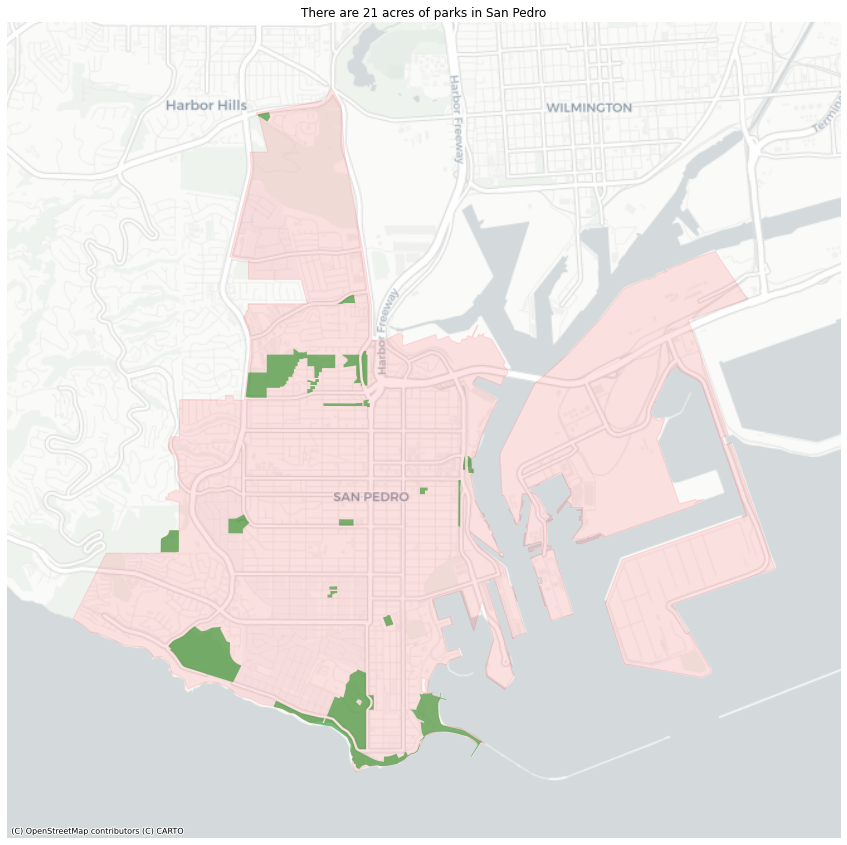

In [18]:
neighborhood_name='San Pedro'

neighborhood = neighborhoods[neighborhoods.neighborhood==neighborhood_name]

parks_by_neighborhood = parks[parks.neighborhood==neighborhood_name]

minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

fig, ax = plt.subplots(figsize=(15, 15))

neighborhood.plot(ax=ax,
                   figsize=(12,12),
                         color='red', 
                         edgecolor='red',
                         alpha=0.1)

parks_by_neighborhood.plot(ax=ax, 
            color='green',
            alpha=0.5)

ax.set_xlim(minx - 1000, maxx + 1000) 
ax.set_ylim(miny - 1000, maxy + 1000)

ax.axis('off')

ax.set_title('There are ' + str(len(parks_by_neighborhood)) + ' acres of parks in ' + neighborhood_name)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)